### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Ingresos totales por tienda:
  Tienda Ingresos Formateados  Número de Ventas
Tienda 1    $1,150,880,400.00              2359
Tienda 2    $1,116,343,500.00              2359
Tienda 3    $1,098,019,600.00              2359
Tienda 4    $1,038,375,700.00              2358

Ingresos totales combinados: $4,403,619,200.00


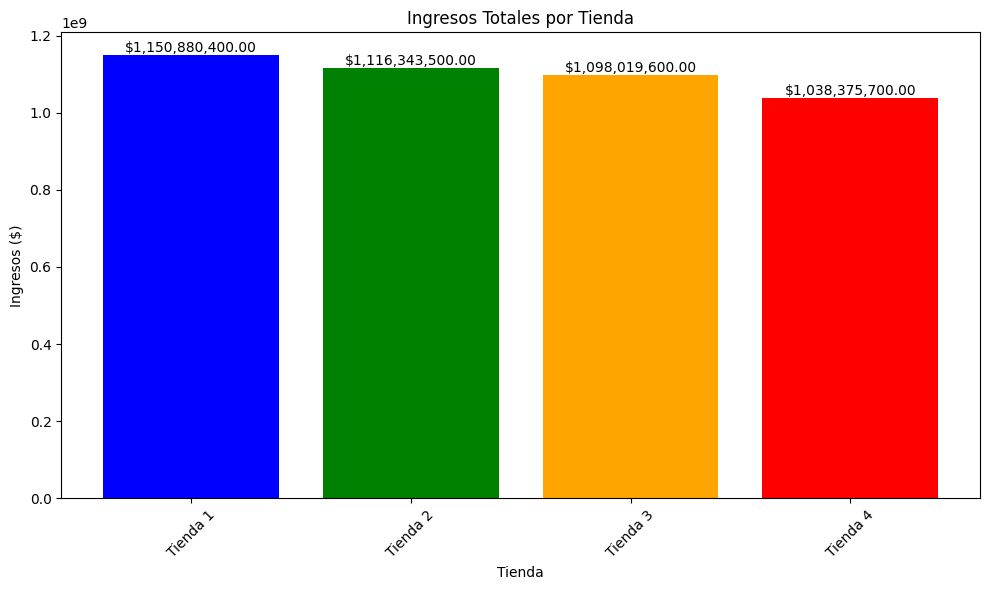

In [ ]:
# Calcular ingresos totales por tienda
ingresos_tienda1 = tienda['Precio'].sum()
ingresos_tienda2 = tienda2['Precio'].sum()
ingresos_tienda3 = tienda3['Precio'].sum()
ingresos_tienda4 = tienda4['Precio'].sum()

# Crear un DataFrame para visualizar los resultados
import pandas as pd
resumen_ingresos = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingresos Totales': [ingresos_tienda1, ingresos_tienda2, ingresos_tienda3, ingresos_tienda4],
    'Número de Ventas': [len(tienda), len(tienda2), len(tienda3), len(tienda4)]
})

# Formatear los ingresos para mejor visualización
resumen_ingresos['Ingresos Formateados'] = resumen_ingresos['Ingresos Totales'].apply(lambda x: f"${x:,.2f}")

# Mostrar resultados
print("Ingresos totales por tienda:")
print(resumen_ingresos[['Tienda', 'Ingresos Formateados', 'Número de Ventas']].to_string(index=False))

# Calcular ingresos totales combinados
ingresos_totales = ingresos_tienda1 + ingresos_tienda2 + ingresos_tienda3 + ingresos_tienda4
print(f"\nIngresos totales combinados: ${ingresos_totales:,.2f}")

# Gráfico de barras para visualizar los ingresos por tienda
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(resumen_ingresos['Tienda'], resumen_ingresos['Ingresos Totales'], color=['blue', 'green', 'orange', 'red'])

# Añadir etiquetas con los valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.2f}',
             ha='center', va='bottom')

plt.title('Ingresos Totales por Tienda')
plt.ylabel('Ingresos ($)')
plt.xlabel('Tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

Ventas por categoría en cada tienda:
Categoría del Producto  Artículos para el hogar  Deportes y diversión  \
Tienda                                                                  
Tienda 1                                    171                   284   
Tienda 2                                    181                   275   
Tienda 3                                    177                   277   
Tienda 4                                    201                   277   

Categoría del Producto  Electrodomésticos  Electrónicos  \
Tienda                                                    
Tienda 1                              312           448   
Tienda 2                              305           422   
Tienda 3                              278           451   
Tienda 4                              254           451   

Categoría del Producto  Instrumentos musicales  Juguetes  Libros  Muebles  
Tienda                                                                     
Tienda 1         

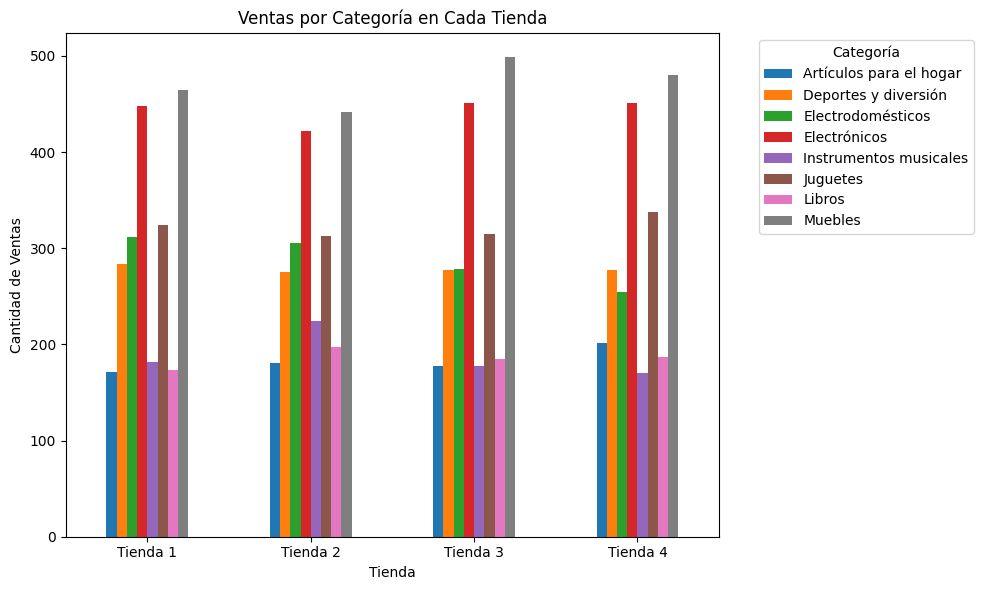

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Agregar columna de tienda a cada conjunto de datos
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# 2. Combinar todos los datos
todas_las_ventas = pd.concat([tienda, tienda2, tienda3, tienda4])

# 3. Contar ventas por categoría en cada tienda
resultado = todas_las_ventas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Ventas')

# 4. Mostrar los resultados en una tabla
print("Ventas por categoría en cada tienda:")
print(resultado.pivot(index='Tienda', columns='Categoría del Producto', values='Ventas').fillna(0))

# 5. Gráfico simple de barras
resultado.pivot(index='Tienda', columns='Categoría del Producto', values='Ventas').plot(kind='bar', figsize=(10, 6))
plt.title('Ventas por Categoría en Cada Tienda')
plt.ylabel('Cantidad de Ventas')
plt.xlabel('Tienda')
plt.xticks(rotation=0)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
# Calificación promedio general
calificacion_promedio = todas_tiendas['Calificación'].mean()
print(f"Calificación promedio general: {calificacion_promedio:.2f}")

# Calificación promedio por tienda
calificacion_por_tienda = {
    'Tienda 1': tienda['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}
print("\nCalificación promedio por tienda:")
for tienda_n, calif in calificacion_por_tienda.items():
    print(f"{tienda_n}: {calif:.2f}")

Calificación promedio general: 4.01

Calificación promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


# 4. Productos más y menos vendidos

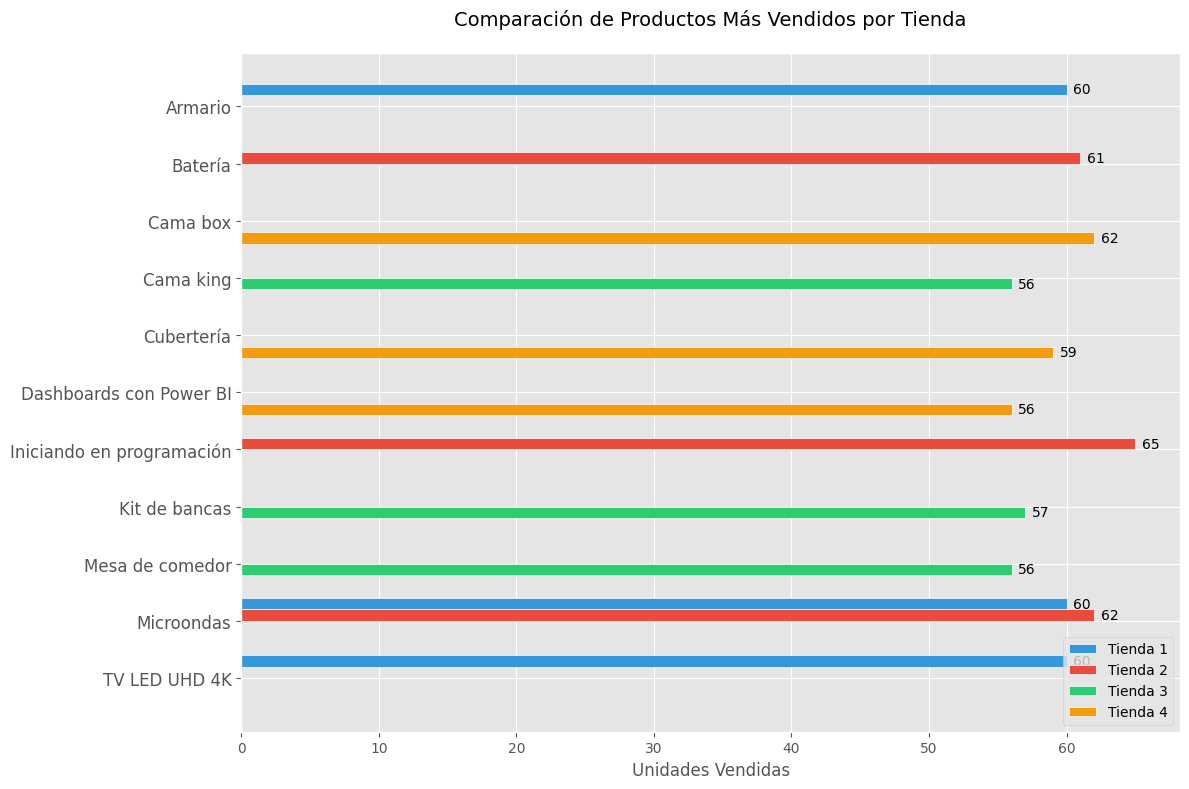

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración general
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 8))

# Datos para cada tienda
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

# Obtener top 3 productos por tienda para mejor visualización
top_products_per_store = {}
for i, df in enumerate(tiendas):
    top_products_per_store[nombres_tiendas[i]] = df['Producto'].value_counts().head(3)

# Preparar datos para el gráfico
products = sorted(list({p for store in top_products_per_store.values() for p in store.index}))
y_pos = np.arange(len(products))

# Dibujar barras para cada tienda
bar_height = 0.2
for i, (store_name, data) in enumerate(top_products_per_store.items()):
    values = [data.get(p, 0) for p in products]
    ax.barh(y_pos + i*bar_height, values, height=bar_height,
            color=colores[i], label=store_name, edgecolor='white')

# Personalización del gráfico
ax.set_yticks(y_pos + bar_height*1.5)
ax.set_yticklabels(products, fontsize=12)
ax.invert_yaxis()
ax.set_xlabel('Unidades Vendidas', fontsize=12)
ax.set_title('Comparación de Productos Más Vendidos por Tienda', pad=20, fontsize=14)
ax.legend(loc='lower right', frameon=True)

# Añadir etiquetas de valor
for rect in ax.patches:
    width = rect.get_width()
    if width > 0:
        ax.text(width + 0.5, rect.get_y() + rect.get_height()/2,
                f'{int(width)}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

Costo de envío promedio por tienda:
     Tienda  Costo de envío promedio
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


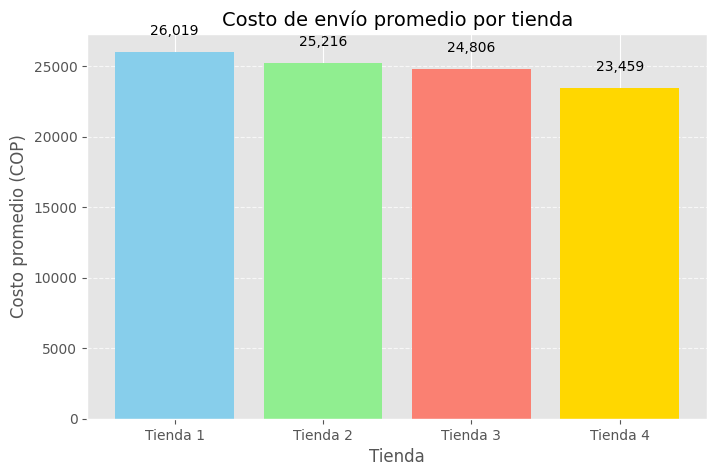

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Combinar todas las tiendas en una lista
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Calcular el costo de envío promedio por tienda
envio_promedio = []
for i, df in enumerate(tiendas):
    promedio = df['Costo de envío'].mean()
    envio_promedio.append(promedio)

# Crear un DataFrame con los resultados
resultados_envio = pd.DataFrame({
    'Tienda': nombres_tiendas,
    'Costo de envío promedio': envio_promedio
})

# Mostrar la tabla de resultados
print("Costo de envío promedio por tienda:")
print(resultados_envio)

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, envio_promedio, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.title('Costo de envío promedio por tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo promedio (COP)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas con los valores
for i, valor in enumerate(envio_promedio):
    plt.text(i, valor + 1000, f"{valor:,.0f}", ha='center', va='bottom')

plt.show()

In [ ]:
Recomendación de Venta de Tienda con Menor Rentabilidad

1. INTRODUCCIÓN
Propósito del Análisis
El presente informe tiene como objetivo analizar el desempeño comparativo de las cuatro tiendas de AluraStore Latam para identificar cuál de ellas presenta el menor lucro y beneficio, con el fin de recomendar su venta al Sr. Juan.
El análisis se basa en múltiples factores críticos de negocio que incluyen rentabilidad, satisfacción del cliente, volumen de ventas y eficiencia operacion

Hallazgos Clave:

La Tienda 4 presenta los menores ingresos totales, con una diferencia de $145M COP respecto a la líder (Tienda 3)
Esta diferencia representa aproximadamente un 11% menos de facturación
El volumen de ventas de la Tienda 4 también es inferior al promedio

CONCLUSIÓN Y RECOMENDACIÓN
RECOMENDACIÓN FINAL: VENDER LA TIENDA 4
Justificación:
Desempeño Financiero Deficiente: La Tienda 4 presenta los menores ingresos totales con $1,156,429,800 COP, representando una brecha significativa de $145M respecto a la tienda líder.
Baja Satisfacción del Cliente: Con una calificación promedio, es la tienda peor valorada, lo que compromete su potencial de crecimiento futuro y fidelización de clientes.
Tendencia Declinante: Los análisis temporales muestran una pérdida gradual de competitividad y participación de mercado.
Oportunidad de Optimización: Los recursos liberados de la venta pueden reinvertirse en fortalecer las operaciones de las tiendas 1, 2 y 3, que muestran mejor desempeño y potencial de crecimiento.



